In [1]:
import pandas as pd
train_dataset = pd.read_csv('./data/MNIST/mnist_train.csv')
test_dataset = pd.read_csv('./data/MNIST/mnist_test.csv')

In [2]:
train_dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Split to Image & Label

# train_image
train_images = (train_dataset.iloc[:, 1:].values).astype('float32') # values는 속성값들만 추출.
# train_labels
train_labels = train_dataset['label'].values

# test
test_images = (test_dataset.iloc[:, 1:].values).astype('float32')
test_labels = test_dataset['label'].values

In [5]:
# Check Train Data's Image
train_images # 28 * 28 = 784개의 데이터

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# Check Train Data's Label
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [7]:
# Check Test Data's Image
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
# Check Test Data's Label
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [9]:
# Split into Train, Valid Dataset
from sklearn.model_selection import train_test_split
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images,
                                                                          train_labels,
                                                                          stratify = train_labels,
                                                                          random_state = 42,
                                                                          test_size = 0.2)

- train_test_split(train_images, train_labels, stratify, random_state, test_size)
    - train_images : 기존 정의 train_images
    - train_labels : 기존 정의 train_labels
    
    - shuffle
        - default = True
        - split을 해주기 이전에 섞을지 여부. (주로 default)
    - stratify
        - default = None
        - classification을 다룰 때 매우 중요한 옵션.
        - stratify = 'Target' 으로 지정시,
            - 각각의 class 비율을 train / validation에 유지.
            - 한쪽에 쏠려서 분배되는 것을 방지.
    - random_state
        - 세트를 섞을 때 parameter 값을 보고 섞음.
        - 하이퍼 파라미터 튜닝 시,
            - 값을 지정해둬야 매번 데이터셋이 변경되는 것을 방지.
    - test_size
        - default = 0.25
        - 테스트 셋 구성의 비율.
        - train_size 옵션과 반대 관계. (주로 test_size를 지정)
        - ex) 0.2 : 전체 데이터의 20%를 test로 지정하겠다.

In [10]:
# Check Train, Valid, Test Image's Shape
print('The Shape of Train Images: ', train_images.shape)
print('The Shape of Valid Images: ', valid_images.shape)
print('The Shape of Test Images: ', test_images.shape)

The Shape of Train Images:  (48000, 784)
The Shape of Valid Images:  (12000, 784)
The Shape of Test Images:  (10000, 784)


In [11]:
# Check Train, Valid Label's Shape
print('The Shape of Train Labels: ', train_labels.shape)
print('The Shape of Valid Labels: ', valid_labels.shape)
print('The Shape of Test Labels: ', test_labels.shape)

The Shape of Train Labels:  (48000,)
The Shape of Valid Labels:  (12000,)
The Shape of Test Labels:  (10000,)


In [13]:
# Reshape image's size to check for ours
# 784를 좀 더 보기 편하게 reshape.
train_images = train_images.reshape(train_images.shape[0], 28, 28)
valid_images = valid_images.reshape(valid_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

In [15]:
# Check Train, Valid, Test Image's Shape after reshape
print('The Shape of Train Images: ', train_images.shape)
print('The Shape of Valid Images: ', valid_images.shape)
print('The Shape of Test Images: ', test_images.shape)

The Shape of Train Images:  (48000, 28, 28)
The Shape of Valid Images:  (12000, 28, 28)
The Shape of Test Images:  (10000, 28, 28)


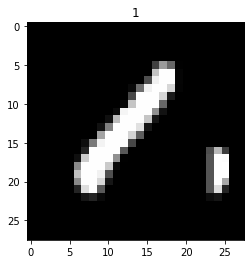

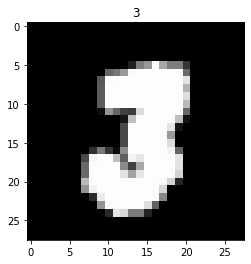

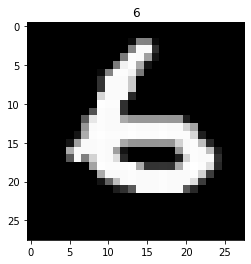

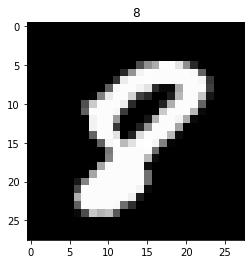

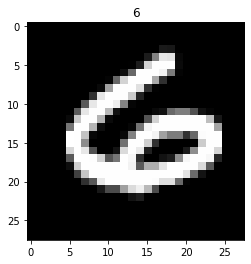

In [18]:
# Visualize Train, Valid, Test's Images
import matplotlib.pyplot as plt
for idx in range(0, 5):
    plt.imshow(train_images[idx], cmap = plt.get_cmap('gray'))
    plt.title(train_labels[idx])
    plt.show()

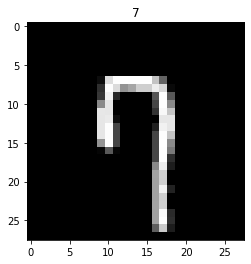

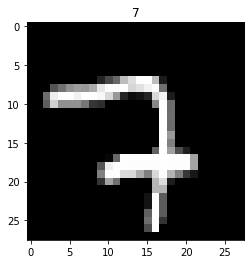

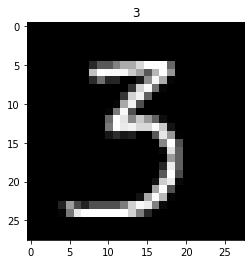

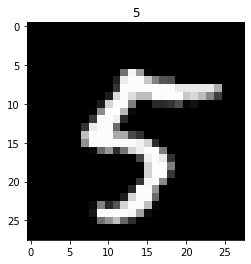

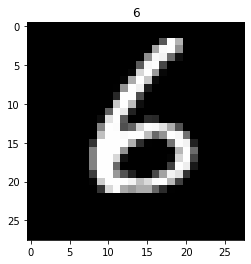

In [19]:
for idx in range(0, 5):
    plt.imshow(valid_images[idx], cmap = plt.get_cmap('gray'))
    plt.title(valid_labels[idx])
    plt.show()

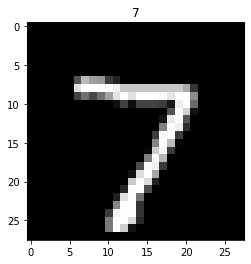

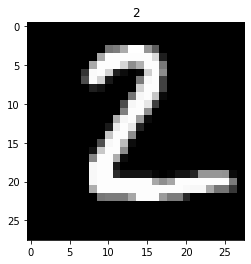

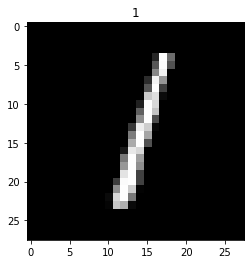

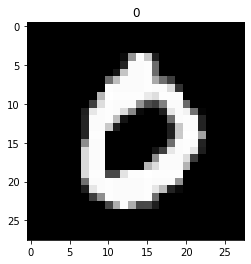

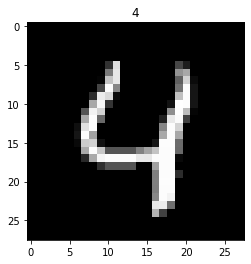

In [20]:
for idx in range(0, 5):
    plt.imshow(test_images[idx], cmap = plt.get_cmap('gray'))
    plt.title(test_labels[idx])
    plt.show()

In [26]:
# Make Dataloader to feed on Multi Layer Perceptron Model
import torch
from torch.utils.data import TensorDataset, DataLoader

train_images_tensor = torch.tensor(train_images)
train_labels_tensor = torch.tensor(train_labels)

train_tensor = TensorDataset(train_images_tensor, train_labels_tensor)
train_loader = DataLoader(train_tensor, batch_size=64, num_workers=0, shuffle=True)

valid_images_tensor = torch.tensor(valid_images)
valid_labels_tensor = torch.tensor(valid_labels)

valid_tensor = TensorDataset(valid_images_tensor, valid_labels_tensor)
valid_loader = DataLoader(valid_tensor, batch_size=64, num_workers=0, shuffle=True)

test_images_tensor = torch.tensor(test_images)
# test데이터는 label이 없다고 가정.
# 위 처리까지는 label까지 저장.

- PyTorch는 image와 label을 Pair 로 묶어 입력으로 넣어주는 경우가 많음.
    - torch.tensor
        - 현재 array 형태로 저장된 데이터를 tensor 형태로 바꿔줌.
    - TensorDataset(train_images_tensor, train_labels_tensor)
        - image, label의 Pair를 만들어줌.
    - DataLoader
        - batch_size
            - bath_size 단위로 image와 label을 나눠줌.
        - num_workers
            - cpu, gpu의 개수. multi processing
        - shuffle

In [34]:
# Create MLP Model
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MLP(nn.Module):
    
    def __init__(self):
        super(MLP, self).__init__() 
            # super를 이용해 nn.Module 내의 함수를 가져옴.
        self.input_layer = nn.Linear(28 * 28, 128)
            # Input : 28*28, Output : 128 (다음 Layer에 대한 Input)
        self.hidden_layer = nn.Linear(128, 128)
        self.output_layer = nn.Linear(128, 10)
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
            # 2차원 이미지를 flatten하는 과정.
        x = F.relu(self.input_layer(x))
            # input_layer을 통과해 나온 값의 Activation을 relu로.
        x = F.relu(self.hidden_layer(x))
            # hidden_layer을 통과해 나온 값의 Activation을 relu로.
        x = self.output_layer(x)
        x = F.log_softmax(x, dim = 1)
            # output_layer을 통과해 나온 값의 Activation을 log_softmax로.
            # softmax에 log를 취함.
            # dim=1 : 같은 차원에 대해 softmax를 취함.
                # 128에서 10으로 갈 때에 대해 softmax를 취함.
        return x
    
USE_CUDA = torch.cuda.is_available()
    # gpu를 이용하는지 (False) cuda를 이용하는지 (True)
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')

model = MLP().to(DEVICE)
    # MLP 클래스를 불러옴. 그 클래스가 어느 device로 갈지에 대해.
optimizer = optim.Adam(model.parameters(), lr=0.001)
    # optim.Adam : optimizer로 Adam을 이용하겠다.
        # 모델.parameters() : model에 대한 parameter를 optimize.
        # lr : 학습률.

print('Model: ', model)
print('Device: ', DEVICE)

Model:  MLP(
  (input_layer): Linear(in_features=784, out_features=128, bias=True)
  (hidden_layer): Linear(in_features=128, out_features=128, bias=True)
  (output_layer): Linear(in_features=128, out_features=10, bias=True)
)
Device:  cpu


In [38]:
# Definite Train & Evaluate
def train(model, train_loader, optimizer): 
        # train_loader: image, label을 batch 단위로 저장.
    model.train() 
        # model.train : model 내 parameter들을 update.
    for batch_idx, (data, target) in enumerate(train_loader):
            # data는 image, target은 label. 이들을 batch 단위로 loop.
        data, target = data.to(DEVICE), target.to(DEVICE)
            # image와 label을 device에 할당.
        optimizer.zero_grad()
            # gradient를 0으로 초기화.
        output = model(data)
            # data를 model에 넣어줘 output을 구함.
            # feed forward를 진행한 최종 output.
        loss = F.cross_entropy(output, target)
            # output(추정값)과 target(실제값) 의 loss를 구해줌.
        loss.backward()
            # back propagation.
        optimizer.step()
            # weight를 update.
        
        if batch_idx % 100 == 0:
            # batch_idx가 100으로 나누어 떨어질 때에 과정을 print
            print("Train Epoch: {} [{}/{} ({:.0f}%)]/tLoss: {:.6f}".format(epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))

def evaluate(model, valid_loader):
    model.eval() 
        # model.eval : model 내 parameter들을 evaluate.
        # parameter들이 update되지 않도록 설정.
    valid_loss = 0 # loss.
    correct = 0 # accuracy.
    
    with torch.no_grad():
        # gradient로 update되지 않도록 억제.
        for data, target in valid_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            valid_loss += F.cross_entropy(output, target, reduction = 'sum').item()
                # validation dataset 내에서 loss를 확인하기 위함.
                # cross_entropy계산을 할 때 횟수를 계산.
                # reduction='sum'
                    # 배치의 data 하나마다 loss가 나오게 됨.
                        # 이를 배치 별로 합하기 위한 결과값.
            prediction = output.max(1, keepdim = True)[1]
                # output.max(1, )
                    # output 결과값 중 softmax 결과가 가장 큰 값 1개를 prediction으로. One-hot encoding
                    # prediction : 그 label로 예측이 됐다.
            correct += prediction.eq(target.view_as(prediction)).sum().item()
                # prediction.eq
                    # target.view_as(prediction): prediction한 one-hot encoding이 실제 label의 one-hot encoding 값과 일치하는지?
                    # 맞으면 correct를 더해줌.
            
    valid_loss /= len(valid_loader.dataset)
    valid_accuracy = 100. * correct / len(valid_loader.dataset)
        # 맞춘 데이터의 수.
    return valid_loss, valid_accuracy

In [ ]:
'''Training'''
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    valid_loss, valid_accuracy = evaluate(model, valid_loader)
    print("[EPOCH: {}], \tValidation Loss: {:.4f}, \tValidation Accuracy: {:.2f} % \n".format(epoch, valid_loss, valid_accuracy))
    
# Validation Loss와 Accuracy를 살펴보아야 함.

In [ ]:
# Predict Test Dataset
def testset_prediction(model, test_images_tensor):
    model.eval()
    result = []
    with torch.no_grad():
        for data in test_images_tensor:
            data = data.to(DEVICE)
            output = model(data)
            prediction = output.max(1, keepdim = True)[1]
            result.append(prediction.tolist())
    return result

# prediction 값을 list에 append하는 형태.

In [ ]:
test_predict_result = testset_prediction(model, test_images_tensor)
test_predict_result[:5]

In [ ]:
import numpy as np
from collections import Counter
Counter(np.squeeze(test_predict_result)).most_common()

In [ ]:
for idx in range(0, 10):
    plt.imshow(test_images[idx], cmpa=plt.get_cmap('gray'))
    plt.title('Predict: ' + str(test_predict_result[idx]))
    plt.show()